# Analiza komentarzy

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltz
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

## O danych

In [116]:
df[["Review Text","Rating", "Recommended IND"]].head()

,Review Text,Rating,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1


In [117]:
print("Liczba wierszy z komentarzami: {}".format(df["Review Text"].describe()[0]))
print("Liczba pustych wierszy: {}".format(df["Review Text"].isnull().sum()))

Liczba wierszy z komentarzami: 22641
Liczba pustych wierszy: 845


In [118]:
print("Liczba wierszy z oceną: {}".format(df["Rating"].describe()[0]))
print("Liczba pustych wierszy: {}".format(df["Rating"].isnull().sum()))

Liczba wierszy z oceną: 23486.0
Liczba pustych wierszy: 0


In [119]:
print("Liczba wierszy z poleceniem: {}".format(df["Recommended IND"].describe()[0]))
print("Liczba pustych wierszy: {}".format(df["Recommended IND"].isnull().sum()))

Liczba wierszy z poleceniem: 23486.0
Liczba pustych wierszy: 0


In [142]:
df["Review Text"]=pd.Series(df["Review Text"].fillna("0"))

Jaka jest średnia ocena produktów?

In [121]:
round(df["Rating"].mean(),2)

4.2

Jaki procent klientów poleca produkt?

In [122]:
str(round(df["Recommended IND"].mean()*100,2))+ "%"

'82.24%'

Jaka jest średia ocen w przypadku braku komentarza?

In [123]:
round(df[df["Review Text"]=="0"]["Rating"].mean(),2)

4.53

Jaki procent klientów poleca produkt w przypadku braku komentarza?

In [124]:
str(round(df[df["Review Text"]=="0"]["Recommended IND"].mean()*100,2))+ "%"

'91.6%'

# W jaki sposób ocenić, czy klient jest zadowolony z zakupu po samej treści komentarza?

!pip install vaderSentiment

## VADER-Sentiment-Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner)

![](http://t-redactyl.io/figure/Vader_1.jpg)

In [125]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [148]:
def sentiment_vader(sentence):
    snt = sid.polarity_scores(sentence)["compound"]
    if snt >= 0:
        return 1
    else:
        return 0

In [149]:
def sentiment_vader_neutral(sentence):
    vs = sid.polarity_scores(sentence)["compound"]
    if vs == 0:
        return "Zdanie neutralne"
    elif vs > 0:
        return "Zdanie pozytywne"
    else:
        return "Zdanie negatywne"

In [169]:
sentencja = input("Napisz sentencję, którs ma zostać oceninona przez bibliotekę Vader Sentiment")
print(sentencja)
print(sentiment_vader_neutral(sentencja))

Napisz sentencję, którs ma zostać oceninona przez bibliotekę Vader Sentiment

Zdanie neutralne


!pip install textblob

# TextBlob: Simplified Text Processing

In [129]:
from textblob import TextBlob

In [130]:
def sentiment_text_blob(sentence): 
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity >= 0: 
        return 1
    else:
        return 0

In [131]:
def sentiment_text_blob_neutral(sentence): 
    analysis = TextBlob(sentence)
    if analysis.sentiment.polarity == 0: 
        return "Zdanie neutralne"
    elif analysis.sentiment.polarity > 0:
        return "Zdanie pozytywne"
    else:
        return "Zdanie negatywne"

In [132]:
sentencja = input("Napisz sentencję, którs ma zostać oceninona przez bibliotekę Text Blob")
print(sentencja)
print(sentiment_text_blob_neutral(sentencja))

Napisz sentencję, którs ma zostać oceninona przez bibliotekę Text Blob

Zdanie neutralne


In [168]:
sentencja = input("Podaj sentencję: \n")
print(f"Czy według biblioteki Vader Sentiment zdanie jest pozytywne? : {sentiment_vader_neutral(sentencja)}")
print(f"Czy według biblioteki Text Blob zdanie jest pozytywne? : {sentiment_text_blob_neutral(sentencja)}")

Podaj sentencję: 

Czy według biblioteki Vader Sentiment zdanie jest pozytywne? : Zdanie neutralne
Czy według biblioteki Text Blob zdanie jest pozytywne? : Zdanie neutralne


### Podajaj numer z przedziału (1-23485), aby przeczytać konkretny komentarz

In [163]:
num = int(input("Podaj numer komentarza, który chcesz zobaczyć (1-23485)"))
if num > 0 and num < 23485:
    text = df["Review Text"][num-1]
    rekomendacja = df["Recommended IND"][num-1]
    print(f"Komentarz numer {num}:\n\n {text}")
    print(f"\nRekomendajca klienta: {'Tak' if rekomendacja == 1 else 'Nie'}")
    print(f"\nRekomendacja według biblioteki Vader Sentiment: {sentiment_vader_neutral(text)}")
    print(f"\nRekomendacja według biblioteki Text Blob: {sentiment_text_blob_neutral(text)}")
else:
    print("Podałeś złą wartość")

Podaj numer komentarza, który chcesz zobaczyć (1-23485)3456
Komentarz numer 3456:

 Bought the pink color in the store and just loved the way that they fit me. i ended up ordering the light blue. perfect for a cool summer evening. can be worn with sandals, wedges, or converse sneakers!

Rekomendajca klienta: Tak

Rekomendacja według biblioteki Vader Sentiment: Zdanie pozytywne

Rekomendacja według biblioteki Text Blob: Zdanie pozytywne


In [151]:
sentimentVader = []
for i in range(df["Review Text"].shape[0]):
    sentimentVader.append(sentiment_vader(df["Review Text"][i]))

In [152]:
df['sentimentVader'] = pd.Series(sentimentVader).values

In [153]:
sentimentTextBlob = []
for i in range(df["Review Text"].shape[0]):
    sentimentTextBlob.append(sentiment_text_blob(df["Review Text"][i]))

In [154]:
df['sentimentTextBlob'] = pd.Series(sentimentTextBlob).values

In [155]:
from sklearn.metrics import accuracy_score

## Jaka była precyzja obu bibliotek?

In [164]:
accuracyVader = round(accuracy_score(df["Recommended IND"], df["sentimentVader"]),2)
accuracyTextBlob = round(accuracy_score(df["Recommended IND"], df["sentimentTextBlob"]),2)
print("- biblioteka Vader: {}".format(accuracyVader))
print("- biblioteka Text Blob: {}".format(accuracyTextBlob))

- biblioteka Vader: 0.84
- biblioteka Text Blob: 0.83


In [165]:
text = ' '.join(df["Review Text"])

In [178]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

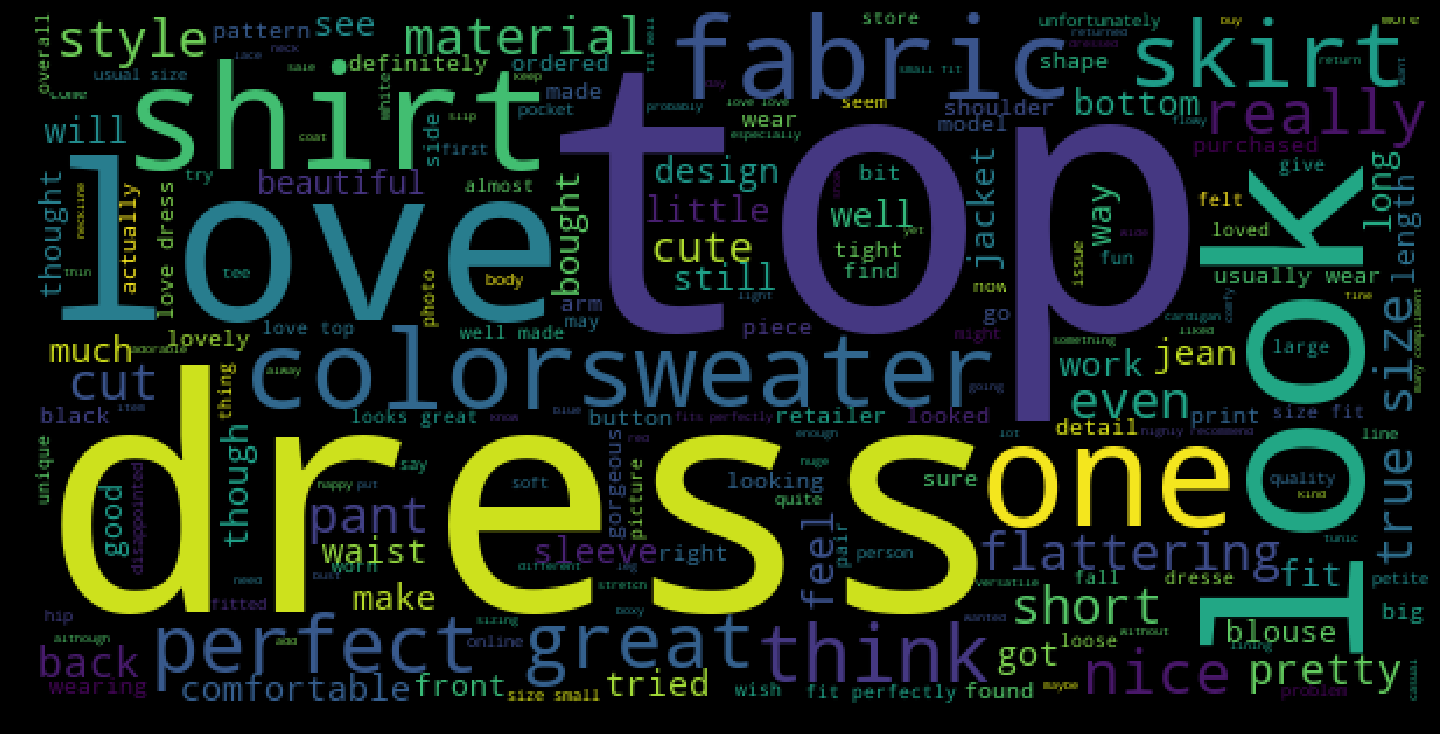

In [179]:
wordcloud = WordCloud(width=600, height=300).generate(text)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()